<a href="https://colab.research.google.com/github/nguyenanhbinh27042002/Artificial-intelligence-AI-/blob/main/Inverted_pendulum_on_a_cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Inverted pendulum on a cart

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9b06dfe5391cc9150d4e20a2b479cfaa793b8b0155f911e360745eb2e3fda441
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


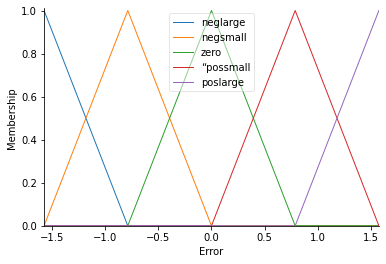

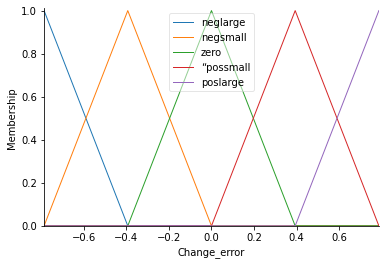

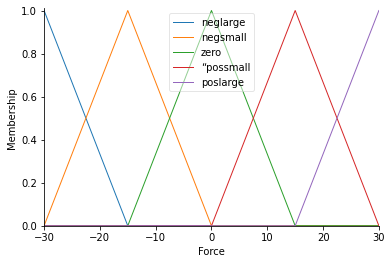

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from math import pi
from skfuzzy.control.controlsystem import Antecedent
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection


universe1 = np.linspace(-np.pi/2,np.pi/2,61) # valve of error describes e(t) for input 
universe2 = np.linspace(-np.pi/4,np.pi/4,61)   # valve of change-in-error describes d/dt(e(t)) for input
universe3 = np.linspace(-30,30,61)   #  valve of force  describes u(t) for output



# Define the membership functions for the input variables
error = ctrl.Antecedent(universe1,'Error')
change_error = ctrl.Antecedent(universe2,'Change_error')

# Define the membership functions for the output variable
force = ctrl.Consequent(universe3,'Force')

name_error=['neglarge','negsmall','zero','possmall','poslarge']
name_change_error=['neglarge','negsmall','zero','possmall','poslarge']
name_force =['neglarge','negsmall','zero','possmall','poslarge']

error.automf(names=name_error)
change_error.automf(names=name_change_error)
force.automf(names=name_force )

error.view()
change_error.view()
force.view()

# Define Rules
rule = []
# rule poslarge (2)
rule.append(ctrl.Rule(antecedent=((error['neglarge'] & change_error['neglarge'])|
                                  (error['neglarge'] & change_error['negsmall'])|(error['neglarge'] & change_error['zero'])|
                                  (error['negsmall'] & change_error['neglarge'])|
                                  (error['zero'] & change_error['neglarge'])),consequent=force['FSR'],label='rule poslarge'))
# rule possmall (1)
rule.append(ctrl.Rule(antecedent=((error['possmall'] & change_error['neglarge'])|(error[''] & change_error[''])|
                                  error[''] & da[''])|
                                  (error['N'] & change_error['0'])|(error['LN'] & change_error['1'])|
                                  (error['LN'] & da['2'])),consequent=M['NSR'],label='rule NSR'))
rule.append(ctrl.Rule(antecedent=((error['P'] & change_error['-2'])|(error['P'] & change_error['-1'])|
                                  (error['ZE'] & da['0'])|
                                  (error['N'] & change_error['1'])|(error['N'] & change_error['2'])),
                                  consequent=M['Slow'],label='rule Slow'))
rule.append(ctrl.Rule(antecedent=((error['LP'] & change_error['-2'])|(error['LP'] & change_error['-1'])|
                                  (error['P'] & da['0'])|
                                  (error['P'] & change_error['1'])|(error['ZE'] & change_error['1'])|
                                  (error['ZE'] & da['2'])),consequent=M['NSF'],label='rule NSF'))
rule.append(ctrl.Rule(antecedent=((error['LP'] & change_error['0'])|(error['LP'] & change_error['1'])|
                                  (error['LP'] & da['2'])|(a['P'] & da['2'])),consequent=M['FSF'],label='rule FSF'))
#Control system
motor_ctrl = ctrl.ControlSystem(rule)
motor_simulation=ctrl.ControlSystemSimulation(motor_ctrl,flush_after_run=61*61+1)
# Compute
upsampled = np.linspace(-pi/2,pi/2,61)
x,y = np.meshgrid(upsampled,upsampled)
z =np.zeros_like(x)
for i in range(61):
  for j in range(61):
      motor_simulation.input['Anpha']= x[i,j]
      motor_simulation.input['d_anpha']= y[i,j]
      motor_simulation.compute()
      z[i,j]= motor_simulation.output['Motor']

# print(motor_simulation.output['Motor'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1 ,cstride=1 ,cmap='viridis',linewidth=0.4,antialiased =True)
cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)
ax.view_init(30,200)

# power
M.view(sim = motor_simulation)


<ipython-input-20-f35af0fdd3cc>:85: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
<ipython-input-20-f35af0fdd3cc>:86: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
<ipython-input-20-f35af0fdd3cc>:87: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)


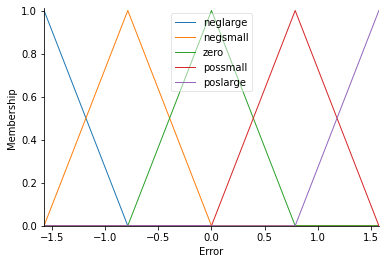

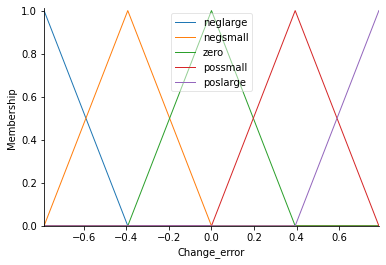

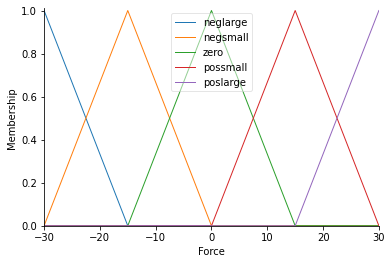

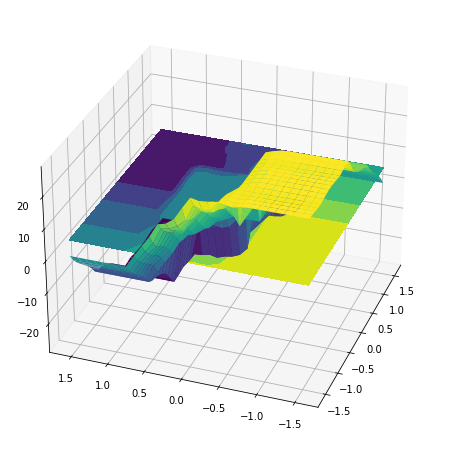

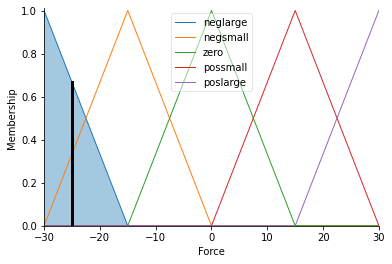

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from skfuzzy.control.controlsystem import Antecedent
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection


universe1 = np.linspace(-np.pi/2,np.pi/2,61) # valve of error describes e(t) for input 
universe2 = np.linspace(-np.pi/4,np.pi/4,61)   # valve of change-in-error describes d/dt(e(t)) for input
universe3 = np.linspace(-30,30,61)   #  valve of force  describes u(t) for output



# Define the membership functions for the input variables
error = ctrl.Antecedent(universe1,'Error')
change_error = ctrl.Antecedent(universe2,'Change_error')

# Define the membership functions for the output variable
force = ctrl.Consequent(universe3,'Force')

name_error=['neglarge','negsmall','zero','possmall','poslarge']
name_change_error=['neglarge','negsmall','zero','possmall','poslarge']
name_force =['neglarge','negsmall','zero','possmall','poslarge']

error.automf(names=name_error)
change_error.automf(names=name_change_error)
force.automf(names=name_force )

error.view()
change_error.view()
force.view()

# Define Rules
rule = []
# rule poslarge (2)
rule.append(ctrl.Rule(antecedent=((error['neglarge'] & change_error['neglarge'])|
                                  (error['neglarge'] & change_error['negsmall'])|(error['neglarge'] & change_error['zero'])|
                                  (error['negsmall'] & change_error['neglarge'])|
                                  (error['zero'] & change_error['neglarge'])),consequent=force['poslarge'],label='rule poslarge'))
# rule possmall (1)
rule.append(ctrl.Rule(antecedent=((error['possmall'] & change_error['neglarge'])|
                                  (error['zero'] & change_error['possmall'])|
                                  (error['negsmall'] & change_error['zero'])|
                                  (error['neglarge'] & change_error['possmall'])),
                                  consequent=force['possmall'],label='rule possmall'))

# rule zero (0)
rule.append(ctrl.Rule(antecedent=((error['poslarge'] & change_error['neglarge'])|(error['possmall'] & change_error['negsmall'])|
                                  (error['zero'] & change_error['zero'])|
                                  (error['negsmall'] & change_error['possmall'])|(error['neglarge'] & change_error['poslarge'])),
                                  consequent=force['zero'],label='rule zero'))
# rule negsmall (-1)
rule.append(ctrl.Rule(antecedent=((error['poslarge'] & change_error['zero'])|(error['zero'] & change_error['possmall'])|
                                  (error['negsmall'] & change_error['poslarge'])|
                                  (error['poslarge'] & change_error['negsmall'])),consequent=force['negsmall'],label='rule negsmall'))

# rule neglarge (-2)
rule.append(ctrl.Rule(antecedent=((error['poslarge'] & change_error['zero'])|(error['possmall'] & change_error['possmall'])|
                                  (error['possmall'] & change_error['possmall'])|(error['zero'] & change_error['poslarge'])|
                                  (error['possmall'] & change_error['poslarge'])|(error['poslarge'] & change_error['poslarge']))
                                  ,consequent=force['neglarge'],label='rule neglarge'))



#Control system
force_ctrl = ctrl.ControlSystem(rule)
force_simulation=ctrl.ControlSystemSimulation(force_ctrl,flush_after_run=61*61+1)
# Compute
upsampled = np.linspace(-pi/2,pi/2,30)
x,y = np.meshgrid(upsampled,upsampled)
z =np.zeros_like(x)
for i in range(30):
  for j in range(30):
      force_simulation.input['Error']= x[i,j]
      force_simulation.input['Change_error']= y[i,j]
      force_simulation.compute()
      z[i,j]= force_simulation.output['Force']

# print(motor_simulation.output['Motor'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1 ,cstride=1 ,cmap='viridis',linewidth=0.4,antialiased =True)
cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)
ax.view_init(30,200)

# power
force.view(sim = force_simulation)
